In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import sklearn


In [2]:
%store -r talk_topics_df

In [3]:
talk_topics_df.head()

,Comedy,Religion,Economy,Healthcare,MarineLife,Family,Urban_Civilization,Robotics,Neurology,Education,...,Network,Gaming,NASA,Environment,Space,Transplant,Music,HealthInNations,TalkTranscript,Views
0,0.082460,0.012796,0.000000,0.000000,0.000000,0.034273,0.00000,0.000000,0.015973,0.095409,...,0.000000,0.001356,0.017919,0.003588,0.0,0.000000,0.005558,0.003898,Good morning. How are you?(Laughter)It's been ...,47227110.0
1,0.064239,0.000000,0.025819,0.000000,0.000505,0.001593,0.01136,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005992,0.0,0.000000,0.008001,0.006412,"Thank you so much, Chris. And it's truly a gre...",3200520.0
2,0.087759,0.000000,0.033679,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.071777,0.000000,0.000000,0.000000,0.0,0.007233,0.045748,0.000000,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1636292.0
3,0.008938,0.002402,0.043215,0.011166,0.000000,0.006954,0.13215,0.000000,0.000000,0.018994,...,0.000000,0.000000,0.000000,0.064382,0.0,0.000000,0.000000,0.011473,If you're here today — and I'm very happy that...,1697550.0
4,0.006039,0.000000,0.000000,0.007927,0.000000,0.034207,0.00000,0.000602,0.000000,0.009043,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.317784,"About 10 years ago, I took on the task to teac...",12005869.0


In [4]:
ted_talk_final = talk_topics_df.drop(columns = ['TalkTranscript'])

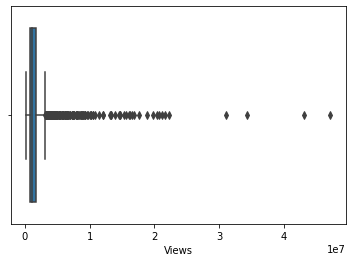

In [5]:
sns.boxplot(x = talk_topics_df['Views']);

In [6]:
talk_topics_df = talk_topics_df[talk_topics_df['Views'] <= 20000000.0]

In [7]:
ted_talk_final.head()

,Comedy,Religion,Economy,Healthcare,MarineLife,Family,Urban_Civilization,Robotics,Neurology,Education,...,Cancer,Network,Gaming,NASA,Environment,Space,Transplant,Music,HealthInNations,Views
0,0.082460,0.012796,0.000000,0.000000,0.000000,0.034273,0.00000,0.000000,0.015973,0.095409,...,0.000000,0.000000,0.001356,0.017919,0.003588,0.0,0.000000,0.005558,0.003898,47227110.0
1,0.064239,0.000000,0.025819,0.000000,0.000505,0.001593,0.01136,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005992,0.0,0.000000,0.008001,0.006412,3200520.0
2,0.087759,0.000000,0.033679,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.071777,0.000000,0.000000,0.000000,0.0,0.007233,0.045748,0.000000,1636292.0
3,0.008938,0.002402,0.043215,0.011166,0.000000,0.006954,0.13215,0.000000,0.000000,0.018994,...,0.000009,0.000000,0.000000,0.000000,0.064382,0.0,0.000000,0.000000,0.011473,1697550.0
4,0.006039,0.000000,0.000000,0.007927,0.000000,0.034207,0.00000,0.000602,0.000000,0.009043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.317784,12005869.0


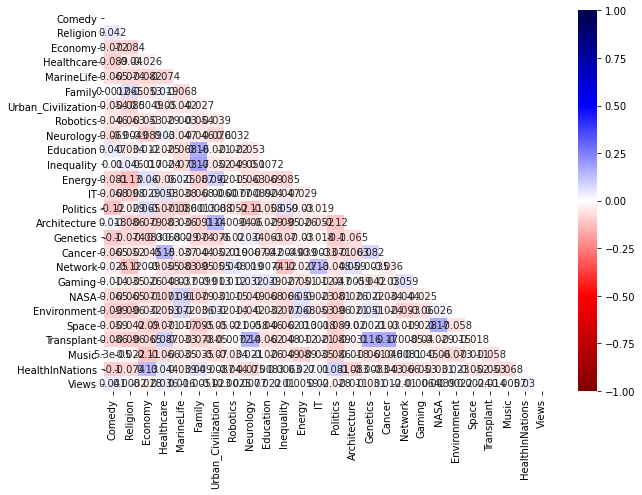

In [8]:
upper = np.triu(ted_talk_final.corr()) 
plt.figure(figsize=(10, 7))
sns.heatmap(ted_talk_final.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

In [9]:
X = ted_talk_final.iloc[:, :25]
y = ted_talk_final['Views']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled= scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
lm.score(X_train_scaled, y_train)

0.011600823601589427

In [15]:
lm.score(X_test_scaled, y_test)

-0.01477957222649895

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual_train = y_train
y_predicted_train = lm.predict(X_train_scaled)
y_predicted_train.shape


(1949,)

In [17]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_actual_train, y_predicted_train))

2581606.0631628833

In [18]:

# Compare the actual y values in the test set with the predicted values
y_actual_test = y_test
y_predicted_test = lm.predict(X_test)
y_predicted_test.shape

(488,)

In [19]:
sqrt(mean_squared_error(y_actual_test, y_predicted_test))

2292914.748941448

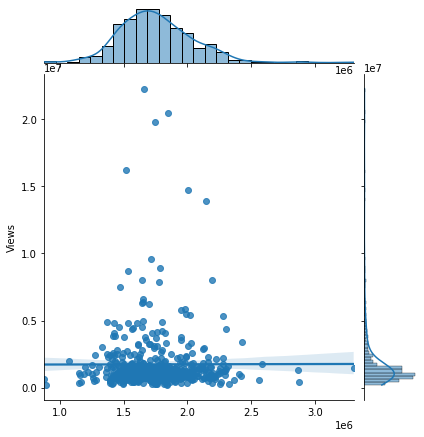

In [20]:
preds = lm.predict(X_test_scaled)

sns.jointplot(x=preds,y=y_test, kind='reg')

In [21]:
import statsmodels.api as sm

#Create the model
model = sm.OLS(y_train, sm.add_constant(X_train)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Views   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9028
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.602
Time:                        00:27:22   Log-Likelihood:                -31540.
No. Observations:                1949   AIC:                         6.313e+04
Df Residuals:                    1923   BIC:                         6.328e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.559e+06   2.44e+05      6.379      0.000    1.08e+06    2.04e+06
Comedy              8.728e+06   3.34e+06      2.615      0.009    2.18e+06    1.53e+07
Religion            1.054e+05   2.65e+06      0.040      0.968   -5.09e+06     5.3e+06
Economy            -3.058e+06   2.68e+06     -1.140      0.254   -8.32e+06     2.2e+06
Healthcare          2.998e+06   3.15e+06      0.953      0.341   -3.17e+06    9.17e+06
MarineLife          2.834e+06   2.62e+06      1.083      0.279    -2.3e+06    7.97e+06
Family              -1.32e+06   3.54e+06     -0.373      0.709   -8.26e+06    5.62e+06
Urban_Civilization -1.579e+06   2.41e+06     -0.656      0.512    -6.3e+06    3.14e+06
Robotics           -2.574e+04   1.89e+06     -0.014      0.989   -3.72e+06    3.67e+06
Neurology           -2.48e+05   2.14e+06     -0.116      0.908   -4.45e+06    3.95e+06
Education           2.586e+06    2.4e+06      1.078      0.281   -2.12e+06    7.29e+06
Inequality          1.596e+05   1.95e+06      0.082      0.935   -3.66e+06    3.98e+06
Energy              1.234e+06   2.42e+06      0.510      0.610   -3.52e+06    5.98e+06
IT                  1.408e+06   2.32e+06      0.607      0.544   -3.14e+06    5.96e+06
Politics           -1.812e+06   2.48e+06     -0.731      0.465   -6.67e+06    3.05e+06
Architecture        1.948e+05    2.2e+06      0.089      0.929   -4.11e+06     4.5e+06
Genetics           -2.895e+06   2.43e+06     -1.190      0.234   -7.67e+06    1.88e+06
Cancer              2.008e+06   2.25e+06      0.894      0.372    -2.4e+06    6.41e+06
Network             -4.65e+05   2.48e+06     -0.187      0.852   -5.34e+06    4.41e+06
Gaming             -4.951e+05   2.41e+06     -0.206      0.837   -5.22e+06    4.22e+06
NASA                7.781e+05   2.12e+06      0.366      0.714   -3.39e+06    4.94e+06
Environment         8.387e+05   2.07e+06      0.406      0.685   -3.21e+06    4.89e+06
Space               8.021e+05    2.1e+06      0.382      0.702   -3.31e+06    4.92e+06
Transplant         -7.282e+05   1.95e+06     -0.374      0.709   -4.55e+06    3.09e+06
Music               2.165e+05   2.11e+06      0.102      0.918   -3.93e+06    4.36e+06
HealthInNations     4.243e+06   1.81e+06      2.343      0.019    6.92e+05    7.79e+06
==============================================================================
Omnibus:                     2838.537   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           994901.659
Skew:                           8.538   Prob(JB):                         0.00
Kurtosis:                     112.360   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [22]:
import scipy.stats as stats
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

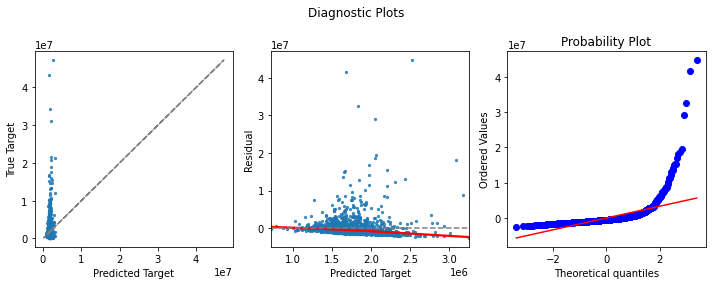

In [23]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)


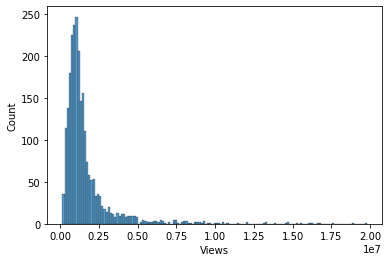

In [24]:
sns.histplot(talk_topics_df['Views']);

## Log Transformation

In [25]:
ted_talk_final['Views_log'] = np.log(ted_talk_final['Views'])

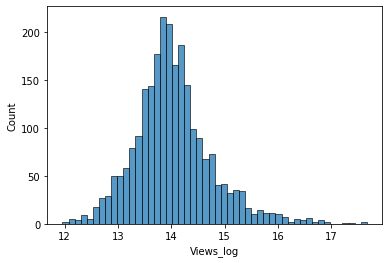

In [26]:
sns.histplot(ted_talk_final['Views_log']);

In [27]:
X = ted_talk_final.iloc[:, :25]
y = ted_talk_final['Views_log']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled= scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
lm.score(X_train_scaled, y_train)

0.00887583808956971

In [32]:
lm.score(X_test_scaled, y_test)

0.003330651759178016

In [40]:
# Compare the actual y values in the test set with the predicted values
y_actual_test = y_test
y_predicted_test = lm.predict(X_test)
y_predicted_test.shape

(488,)

In [41]:
sqrt(mean_squared_error(y_actual_train, y_predicted_train))

2581606.0631628833

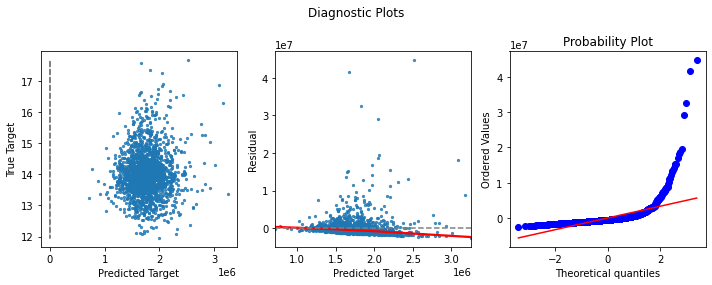

In [33]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)


## Feature Coefficients

In [34]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [35]:
column_names = ['Topics', 'Coefficients']
coefficients.columns = column_names


In [36]:
coefficients.sort_values(by=['Coefficients'], inplace = True)

In [39]:
coefficients.head()

,Topics,Coefficients
15,Genetics,-0.043166
14,Architecture,-0.028614
18,Gaming,-0.025905
2,Economy,-0.020175
21,Space,-0.019059


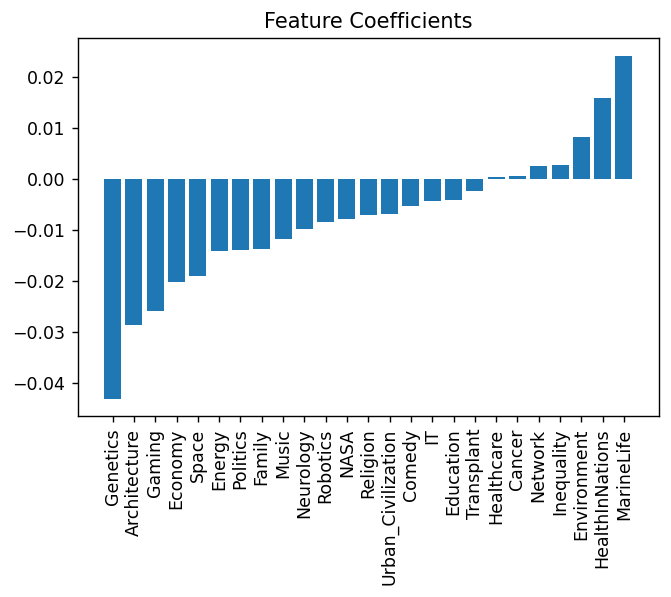

In [38]:
plt.figure(dpi=125)
plt.bar(x = 'Topics', height = 'Coefficients',data = coefficients)
plt.title('Feature Coefficients')
plt.xticks(rotation= 90);